In [1]:
%matplotlib inline
import pandas as pd
import librosa as lib
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Audio
import scipy

In [2]:
model_data1 = pd.read_pickle('DFs/Model_data_Par1.pkl')

In [3]:
model_data1

,C,C_sharp,D,D_sharp,E,F,F_sharp,G,G_sharp,A,...,1_X_disp1_max,1_Y_disp1_avg,1_Y_disp1_min,1_Y_disp1_max,1_Z_disp1_avg,1_Z_disp1_min,1_Z_disp1_max,1_X_disp2_avg,1_Y_disp2_avg,1_Z_disp2_avg
499,0.024484,0.422511,0.052650,1.000000,0.062210,0.043313,0.039779,0.046201,0.019263,0.016141,...,0.056,-0.00285,-0.071,0.141,-0.00318,-0.033,0.027,-0.002585,0.080270,0.000925
500,0.023526,0.419201,0.051463,1.000000,0.062263,0.042093,0.039644,0.045528,0.019323,0.016430,...,0.056,-0.00410,-0.071,0.141,-0.00308,-0.033,0.027,-0.002345,0.079370,0.000930
501,0.023526,0.419201,0.051463,1.000000,0.062263,0.042093,0.039644,0.045528,0.019323,0.016430,...,0.056,-0.00537,-0.071,0.141,-0.00310,-0.033,0.027,-0.002105,0.078505,0.001070
502,0.022984,0.418330,0.048385,1.000000,0.061038,0.040937,0.037992,0.044746,0.018641,0.014605,...,0.056,-0.00686,-0.071,0.141,-0.00313,-0.033,0.027,-0.001880,0.077460,0.000925
503,0.023336,0.422347,0.047611,1.000000,0.058869,0.041117,0.037629,0.046148,0.018517,0.015772,...,0.056,-0.00869,-0.071,0.141,-0.00333,-0.033,0.027,-0.001765,0.076435,0.000935
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17596,0.551258,0.239016,0.590822,0.848327,0.556109,0.694828,1.000000,0.846755,0.592610,0.795401,...,0.031,0.07796,-0.069,0.182,-0.00022,-0.022,0.031,-0.004595,-0.008445,0.000820
17597,0.486828,0.255034,0.616595,0.832311,0.567620,0.685870,1.000000,0.849619,0.508727,0.755731,...,0.031,0.08015,-0.069,0.182,-0.00016,-0.022,0.031,-0.004820,-0.006845,0.000890
17598,0.418250,0.280371,0.653649,0.814706,0.601733,0.692381,1.000000,0.866687,0.420425,0.728755,...,0.031,0.08262,-0.051,0.182,-0.00004,-0.022,0.031,-0.005000,-0.005155,0.000960
17599,0.418250,0.280371,0.653649,0.814706,0.601733,0.692381,1.000000,0.866687,0.420425,0.728755,...,0.031,0.08466,-0.033,0.182,0.00006,-0.022,0.031,-0.005130,-0.003630,0.001030


In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

In [5]:
tscv = TimeSeriesSplit()

In [6]:
X = model_data1.drop(columns=['1_X_disp2_avg', '1_Y_disp2_avg', '1_Z_disp2_avg']).to_numpy()
y = model_data1[['1_X_disp2_avg', '1_Y_disp2_avg', '1_Z_disp2_avg']].sum(axis=1).to_numpy()

In [7]:
X.shape

(17102, 165)

In [8]:
predictions = pd.DataFrame()
scores = pd.DataFrame()

In [9]:
def train_test(model, algo):
    count=1
    scoretemp = {algo+'_R2': [],algo+'_MAE':[], algo+'_MSE':[], algo+'_MAPE':[]}
    predictiontemp = pd.DataFrame()
    for train_index, test_index in tscv.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        predictiontemp[algo + '_y_pred' + str(count)] = y_pred
        scoretemp[algo + '_R2'].append(r2_score(y_test, y_pred))
        scoretemp[algo + '_MAE'].append(mean_absolute_error(y_test, y_pred))
        scoretemp[algo + '_MSE'].append(mean_squared_error(y_test, y_pred))
        scoretemp[algo + '_MAPE'].append(mean_absolute_error(y_test, y_pred))
        count+=1
    scoretemp = pd.DataFrame(scoretemp)
    return scoretemp, predictiontemp

In [10]:
lin = LinearRegression()
scoretemp, predictiontemp = train_test(lin, 'LR')
scores = pd.concat([scores, scoretemp], axis=1)
predictions = pd.concat([predictions, predictiontemp], axis=1)

In [11]:
dummy = DummyRegressor('mean')
scoretemp, predictiontemp = train_test(dummy, 'D')
scores = pd.concat([scores, scoretemp], axis=1)
predictions = pd.concat([predictions, predictiontemp], axis=1)

C:\Users\bwils\anaconda3\envs\micromotion\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass strategy=mean as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [12]:
dt = DecisionTreeRegressor()
scoretemp, predictiontemp = train_test(dt, 'DT')
scores = pd.concat([scores, scoretemp], axis=1)
predictions = pd.concat([predictions, predictiontemp], axis=1)

In [13]:
#rf = RandomForestRegressor(n_estimators=100)
#scoretemp, predictiontemp = train_test(rf, 'RF')
#scores = pd.concat([scores, scoretemp], axis=1)
#predictions = pd.concat([predictions, predictiontemp], axis=1)

In [14]:
svr = SVR()
scoretemp, predictiontemp = train_test(svr, 'SVR')
scores = pd.concat([scores, scoretemp], axis=1)
predictions = pd.concat([predictions, predictiontemp], axis=1)

In [15]:
scores.describe()

,LR_R2,LR_MAE,LR_MSE,LR_MAPE,D_R2,D_MAE,D_MSE,D_MAPE,DT_R2,DT_MAE,DT_MSE,DT_MAPE,SVR_R2,SVR_MAE,SVR_MSE,SVR_MAPE
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,-185.753030,0.195743,0.174281,0.195743,-0.029797,0.035172,0.002024,0.035172,-0.298835,0.038172,0.002213,0.038172,-0.033015,0.035260,0.002084,0.035260
std,410.653268,0.294626,0.374199,0.294626,0.037446,0.008736,0.001083,0.008736,0.467048,0.005054,0.000539,0.005054,0.100325,0.010421,0.001288,0.010421
min,-920.345181,0.036684,0.001948,0.036684,-0.093274,0.025149,0.000924,0.025149,-0.861430,0.031094,0.001392,0.031094,-0.150424,0.025491,0.000969,0.025491
25%,-4.741189,0.051029,0.003892,0.051029,-0.033834,0.032307,0.001431,0.032307,-0.520249,0.036618,0.002056,0.036618,-0.058644,0.029790,0.001238,0.029790
50%,-2.661717,0.073770,0.008765,0.073770,-0.010685,0.032748,0.001669,0.032748,-0.452599,0.038965,0.002319,0.038965,-0.057484,0.030999,0.001563,0.030999
75%,-0.640903,0.095992,0.013178,0.095992,-0.009249,0.036762,0.002376,0.036762,0.022323,0.039068,0.002455,0.039068,-0.024061,0.037916,0.002508,0.037916
max,-0.376162,0.721241,0.843623,0.721241,-0.001945,0.048892,0.003721,0.048892,0.317778,0.045117,0.002842,0.045117,0.125539,0.052106,0.004140,0.052106


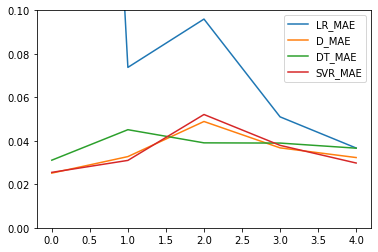

In [16]:
scores.loc[:,scores.columns.str.contains('MAE')].plot()
plt.ylim(0,.1)
plt.show()

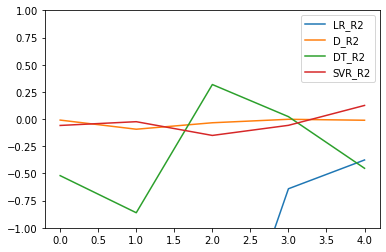

In [17]:
scores.loc[:,scores.columns.str.contains('R2')].plot()
plt.ylim(-1,1)
plt.show()

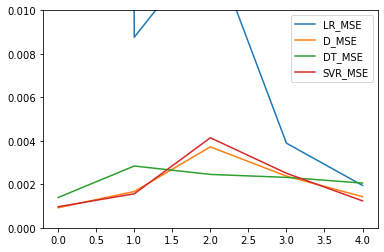

In [18]:
scores.loc[:,scores.columns.str.contains('MSE')].plot()
plt.ylim(0,0.01)
plt.show()

In [19]:
predictions

,LR_y_pred1,LR_y_pred2,LR_y_pred3,LR_y_pred4,LR_y_pred5,D_y_pred1,D_y_pred2,D_y_pred3,D_y_pred4,D_y_pred5,DT_y_pred1,DT_y_pred2,DT_y_pred3,DT_y_pred4,DT_y_pred5,SVR_y_pred1,SVR_y_pred2,SVR_y_pred3,SVR_y_pred4,SVR_y_pred5
0,-0.016850,0.046603,-0.053911,-0.031362,-0.014664,0.00091,-0.000545,0.003432,0.000674,0.000244,-0.020295,0.030305,-0.051835,-0.01618,0.017770,0.005328,0.005328,0.016121,0.013056,-0.006130
1,-0.014561,0.049554,-0.054264,-0.031820,-0.016548,0.00091,-0.000545,0.003432,0.000674,0.000244,-0.020295,0.030305,-0.051835,-0.01618,0.017770,0.005328,0.005328,0.016153,0.012517,-0.005924
2,-0.011580,0.050732,-0.054723,-0.031362,-0.017746,0.00091,-0.000545,0.003432,0.000674,0.000244,-0.020295,0.030305,-0.051835,-0.01618,0.017770,0.005328,0.005328,0.016100,0.012761,-0.005676
3,-0.008575,0.050273,-0.054645,-0.034734,-0.018913,0.00091,-0.000545,0.003432,0.000674,0.000244,-0.020295,0.030305,-0.051835,-0.01618,0.021475,0.005328,0.005328,0.016071,0.013525,-0.006664
4,-0.005970,0.045610,-0.057881,-0.039907,-0.020065,0.00091,-0.000545,0.003432,0.000674,0.000244,-0.020295,0.039900,-0.041945,-0.01618,0.017770,0.005328,0.005328,0.016057,0.012001,-0.007050
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845,0.473982,0.033379,0.100935,-0.011465,0.031220,0.00091,-0.000545,0.003432,0.000674,0.000244,0.021720,-0.059535,0.008840,0.06223,0.013465,0.005328,0.005328,0.015199,-0.009675,-0.004033
2846,0.471815,0.031251,0.083823,-0.012792,0.033295,0.00091,-0.000545,0.003432,0.000674,0.000244,0.021720,-0.059535,0.008840,0.06223,0.035775,0.005328,0.005328,0.015194,-0.009703,-0.003770
2847,0.473951,0.024430,0.082026,-0.014852,0.038178,0.00091,-0.000545,0.003432,0.000674,0.000244,0.021720,-0.059535,0.008840,0.06223,0.035775,0.005328,0.005328,0.015192,-0.009202,-0.002572
2848,0.476829,0.015084,0.080813,-0.015120,0.039878,0.00091,-0.000545,0.003432,0.000674,0.000244,0.021720,-0.059580,0.008840,0.06223,0.035775,0.005328,0.005328,0.015198,-0.008737,-0.002123


In [20]:
def plot_train_test(algo, pred=predictions, y_true=y):
    fig, ax = plt.subplots(2, 3, figsize=(20, 16))
    
    ax[0,0].set_title('1st Train Set')
    ax[0,0].set_xlabel('Time (hs)')
    ax[0,0].set_ylabel('Sum of Motion')
    ax[0,0].plot(predictions[algo + '_y_pred1'], c='red', label='Prediction')
    ax[0,0].plot(y[2851:5701], c='blue', label='Actual')
    ax[0,0].legend()

    ax[0,1].set_title('2nd Train Set')
    ax[0,1].set_xlabel('Time (hs)')
    ax[0,1].set_ylabel('Sum of Motion')
    ax[0,1].plot(predictions[algo + '_y_pred2'], c='red', label='Prediction')
    ax[0,1].plot(y[5702:8551], c='blue', label='Actual')
    ax[0,1].legend()

    ax[0,2].set_title('2nd Train Set')
    ax[0,2].set_xlabel('Time (hs)')
    ax[0,2].set_ylabel('Sum of Motion')
    ax[0,2].plot(predictions[algo + '_y_pred2'], c='red', label='Prediction')
    ax[0,2].plot(y[8552:11401], c='blue', label='Actual')
    ax[0,2].legend()

    ax[1,0].set_title('2nd Train Set')
    ax[1,0].set_xlabel('Time (hs)')
    ax[1,0].set_ylabel('Sum of Motion')
    ax[1,0].plot(predictions[algo + '_y_pred2'], c='red', label='Prediction')
    ax[1,0].plot(y[11401:14251], c='blue', label='Actual')
    ax[1,0].legend()

    ax[1,1].set_title('2nd Train Set')
    ax[1,1].set_xlabel('Time (hs)')
    ax[1,1].set_ylabel('Sum of Motion')
    ax[1,1].plot(predictions[algo + '_y_pred2'], c='red', label='Prediction')
    ax[1,1].plot(y[14251:17101], c='blue', label='Actual')
    ax[1,1].legend()
    
    plt.show()

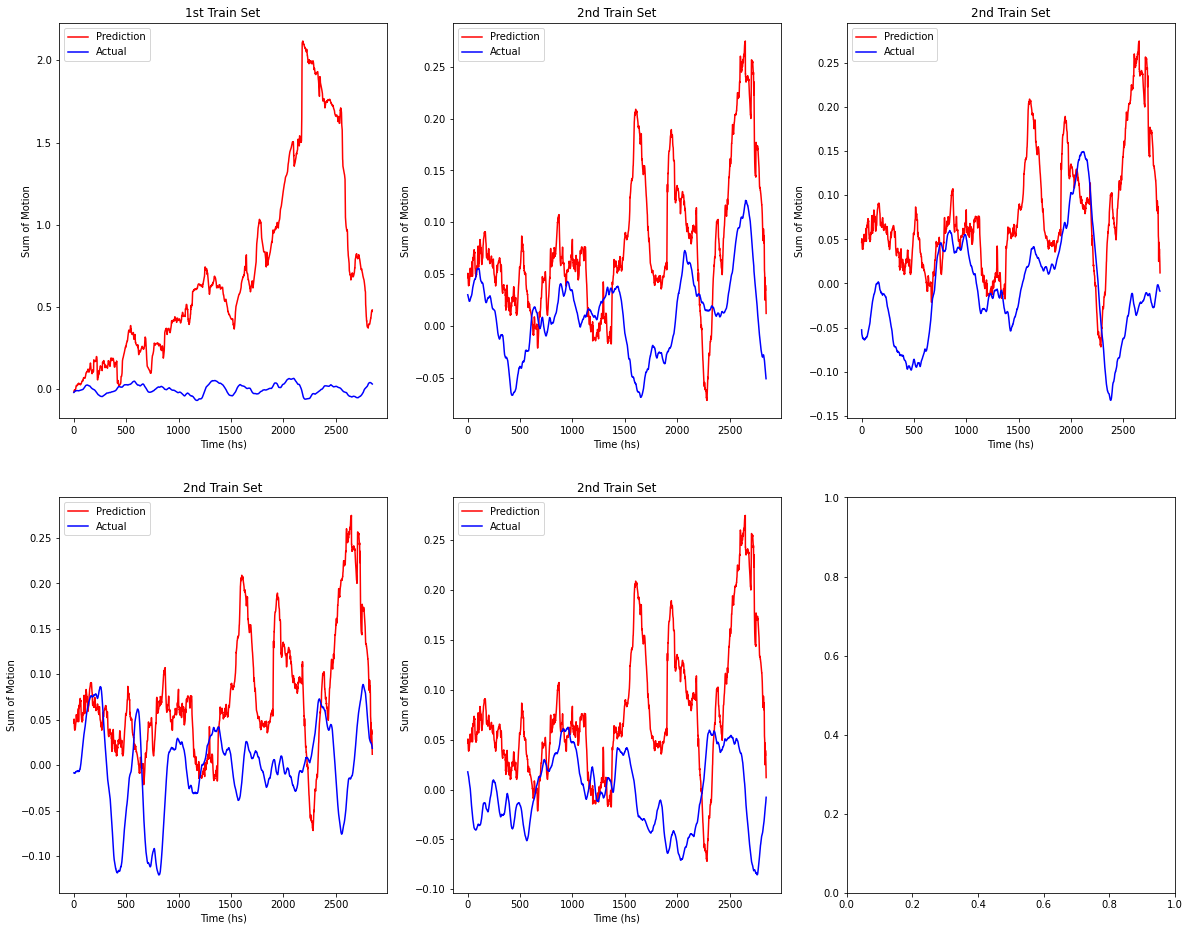

In [21]:
plot_train_test('LR')

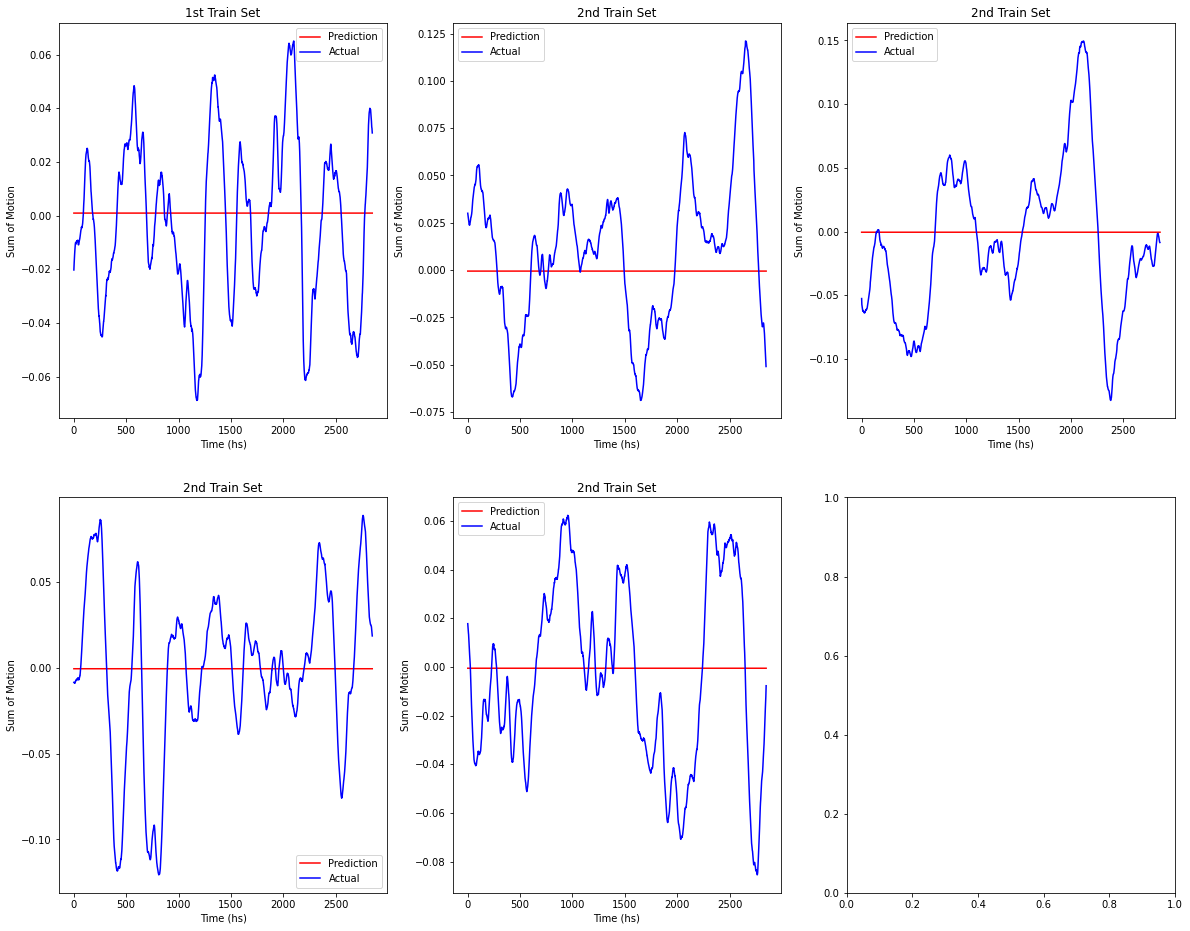

In [22]:
plot_train_test('D')

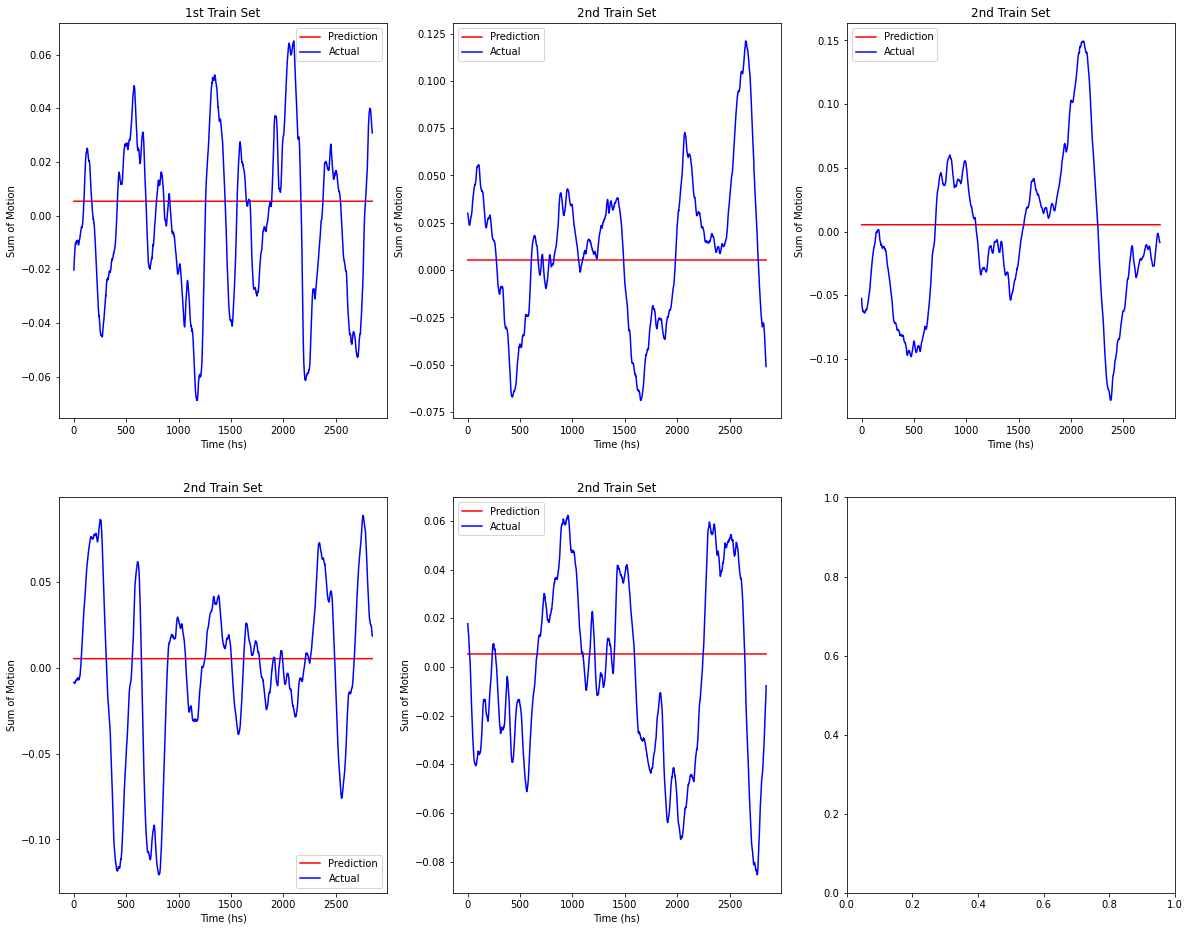

In [23]:
plot_train_test('SVR')

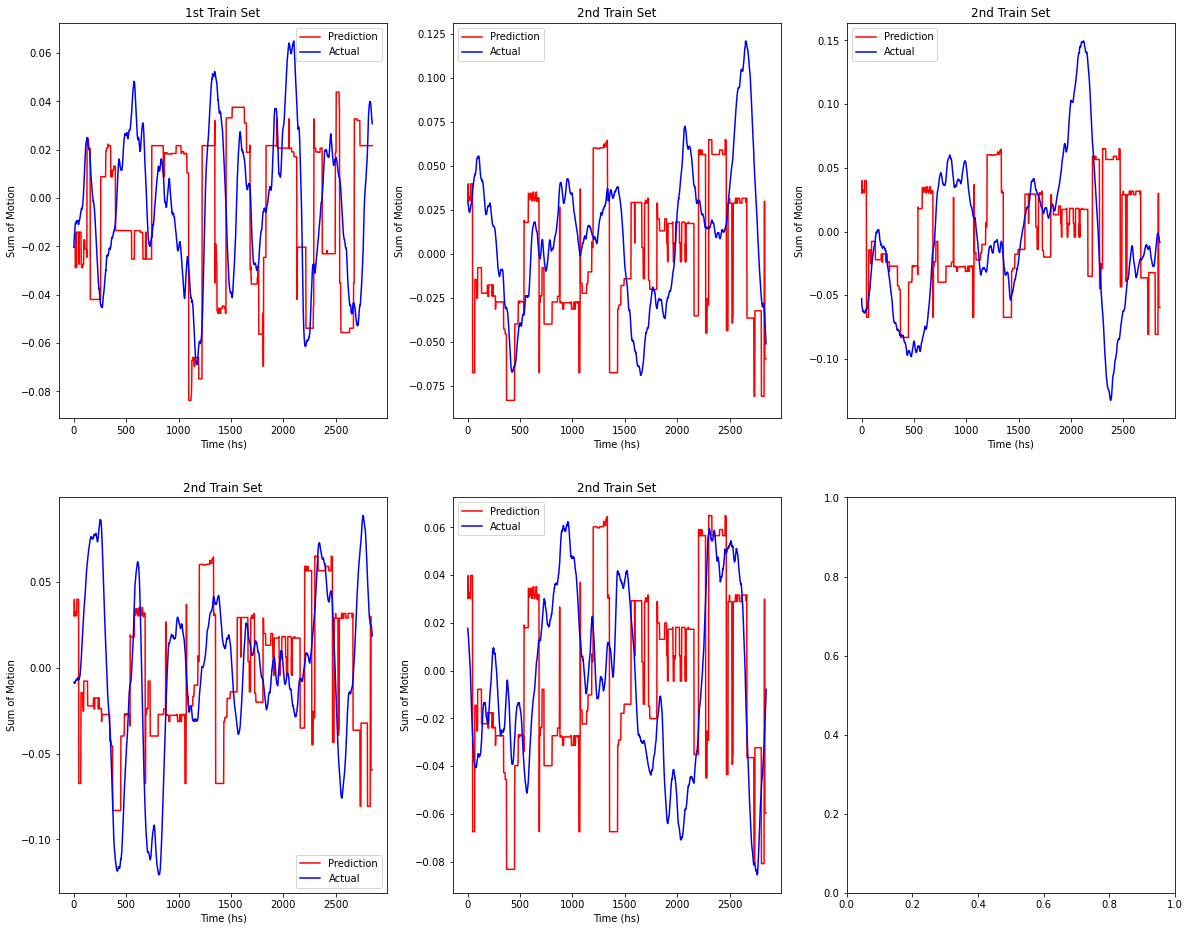

In [24]:
plot_train_test('DT')

In [25]:
#plot_train_test('RF')